In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/AI-Project/transfer learning/resnet50')

In [3]:
!mkdir -p /content/augmented_resized_V2/

In [4]:
!unzip -q /content/drive/MyDrive/AI-Project/train.zip -d /content/augmented_resized_V2/


In [5]:
import torch
from torchvision import datasets
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

class DRPreprocess:
    """Apply retina-specific preprocessing before Tensor conversion."""
    def __call__(self, img):
        img = self.circle_crop(img)
        img = self.apply_clahe(img)
        return img

    def circle_crop(self, pil_img):
        img = np.array(pil_img)
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        radius = min(center)

        mask = np.zeros((h, w), dtype=np.uint8)
        cv2.circle(mask, center, radius, 255, -1)

        cropped = cv2.bitwise_and(img, img, mask=mask)
        return Image.fromarray(cropped)

    def apply_clahe(self, pil_img):
        img = np.array(pil_img)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)

        merged = cv2.merge((cl, a, b))
        enhanced = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)

        return Image.fromarray(enhanced)




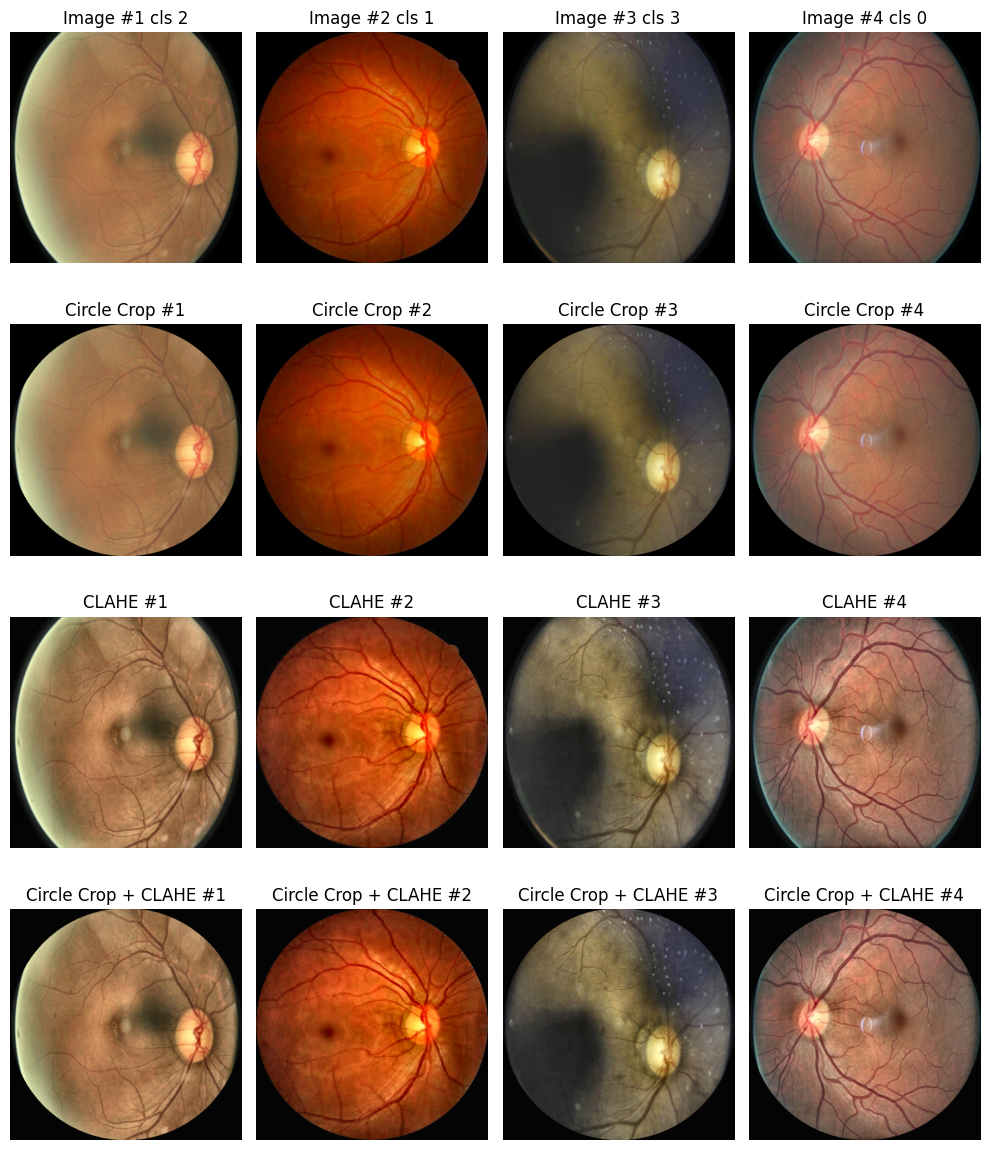

In [11]:
train_dataset = datasets.ImageFolder(
    root="/content/augmented_resized_V2/train",
    transform=None
)

preprocess = DRPreprocess()

# randomly pick 2 images
indices = random.sample(range(len(train_dataset)), 4)

# =========================
# Plot Results
# =========================
fig, axes = plt.subplots(4, 4, figsize=(10, 12))
titles = ["Image","Circle Crop", "CLAHE", "Circle Crop + CLAHE"]

for i, idx in enumerate(indices):
    img, cls = train_dataset[idx]

    # Apply transformations
    img_circle = preprocess.circle_crop(img)
    img_clahe = preprocess.apply_clahe(img)
    img_both = preprocess.apply_clahe(preprocess.circle_crop(img))

    # Plot
    axes[0, i].imshow(img)
    axes[0, i].set_title(f"{titles[0]} #{i+1} cls {cls}")
    axes[0, i].axis("off")

    axes[1, i].imshow(img_circle)
    axes[1, i].set_title(f"{titles[1]} #{i+1}")
    axes[1, i].axis("off")

    axes[2, i].imshow(img_clahe)
    axes[2, i].set_title(f"{titles[2]} #{i+1}")
    axes[2, i].axis("off")

    axes[3, i].imshow(img_both)
    axes[3, i].set_title(f"{titles[3]} #{i+1}")
    axes[3, i].axis("off")

plt.tight_layout()
plt.show()